# **Integrating important liberaries**

In [47]:
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from PIL import Image
import cv2
import glob

import matplotlib.pyplot as plt

# **Preprocess the images , remove the black spaces from the screenshots , normalizing the images values to make it faster in the learning stage and making the dataframe**

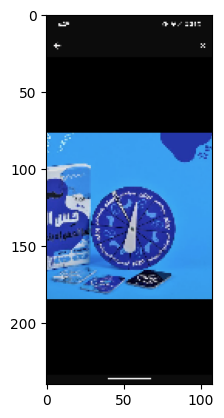

In [49]:
def preprocess_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
    return image


folder_path = "/content/drive/MyDrive/dataSetForSlash/Games"
image_pattern = "*.png"

image_files = glob.glob(folder_path + "/" + image_pattern)
images = []
for image_file in image_files:
    images.append(preprocess_image(image_file, target_size))
data = {
    'image' : images,
    'label' : ['game' for i in range(0,len(images))]
}
df = pd.DataFrame(data)

for i in range(5):
    plt.imshow(images[i])

plt.show()

In [51]:
#make the same for fashion photos
images =[]
folder_path = "/content/drive/MyDrive/dataSetForSlash/fashion"

image_pattern = "*.png"
image_files = glob.glob(folder_path + "/" + image_pattern)
for image_file in image_files:
    images.append(preprocess_image(image_file, target_size))

data = {
    'image' : images,
    'label' : ['fashion' for i in range(0,len(images))]
}


df2 = pd.DataFrame(data)

In [ ]:
df = df.append(df2)

# **Extracting the HOG (Histogram of oriented gradients) feuters from the images to put it in the x train and y train to make the model learn **

In [53]:
X = df['image'].tolist()
y = df['label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def extract_hog_features(images):
    hog_features = []
    for img in images:
        if len(img.shape) == 3:
            img = rgb2gray(img)

        if len(img.shape) != 2:
            raise ValueError("Only grayscale images with two spatial dimensions are supported.")

        hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
        hog_features.append(hog_img)
    return np.array(hog_features)

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# **Using the knn (K-Nearest Neighbors) algorithm for learning and making the model**

In [54]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_hog, y_train)

KNeighborsClassifier()

# **Using the model to pridect the x test **

In [55]:
y_pred = knn_classifier.predict(X_test_hog)

# **Calculating the acuuracy score for the predicted values**

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9375
